### Import

In [2]:
import cv2 as cv
import numpy as np
import math
import matplotlib.image as mpimg

In [3]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1.1 : Image Color Order with different libraries

<IPython.core.display.Javascript object>


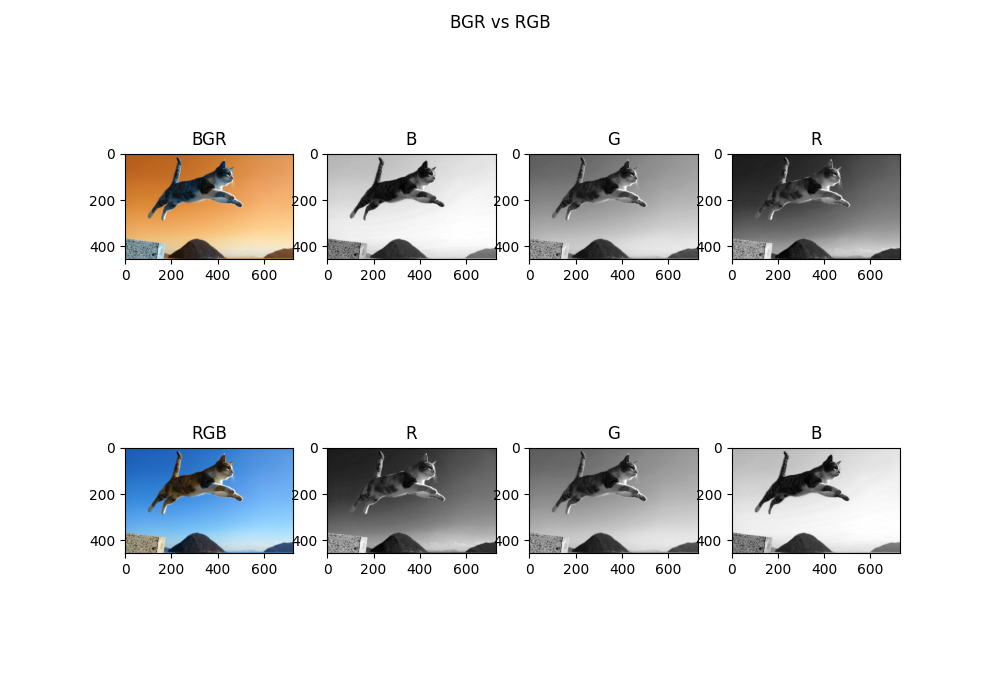

In [46]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("BGR vs RGB")

rows = 2
columns = 4

img = cv.imread("./cat.jpg")

#BGR
fig.add_subplot(rows, columns, 1)
plt.imshow(img)
plt.title("BGR")
plt.show()

b, g, r = cv.split(img)

fig.add_subplot(rows, columns, 2)
plt.imshow(b, cmap='gray')
plt.title("B")
plt.show()

fig.add_subplot(rows, columns, 3)
plt.imshow(g, cmap='gray')
plt.title("G")
plt.show()

fig.add_subplot(rows, columns, 4)
plt.imshow(r, cmap='gray')
plt.title("R")
plt.show()


#RGB
fig.add_subplot(rows, columns, 5)
rgb = plt.imread('./cat.jpg')
plt.imshow(rgb)
plt.title("RGB")
plt.show()

r,g,b = cv.split(rgb)

fig.add_subplot(rows, columns, 6)
plt.imshow(r, cmap='gray')
plt.title("R")
plt.show()

fig.add_subplot(rows, columns, 7)
plt.imshow(g, cmap='gray')
plt.title("G")
plt.show()

fig.add_subplot(rows, columns, 8)
plt.imshow(b, cmap='gray')
plt.title("B")
plt.show()

## 1.2 : Image Reshapes

In [38]:
#OpenCV -> (H, W, C)
#Pytorch -> (C, H, W)

#Original 
original = np.shape(img)
print('Orignal:', original)

#Transpose
transpose = np.transpose(img).shape
print('Transpose:', transpose)

#Move Axis
moveaxis = np.moveaxis(img, 0, -1).shape
print('Move Axis:', moveaxis)

moveaxis = np.moveaxis(img, 0, 1).shape
print('Move Axis:', moveaxis)

Orignal: (457, 728, 3)
Transpose: (3, 728, 457)
Move Axis: (728, 3, 457)
Move Axis: (728, 457, 3)


## 1.3 : Reduce Bit Dept using Quantization

<IPython.core.display.Javascript object>


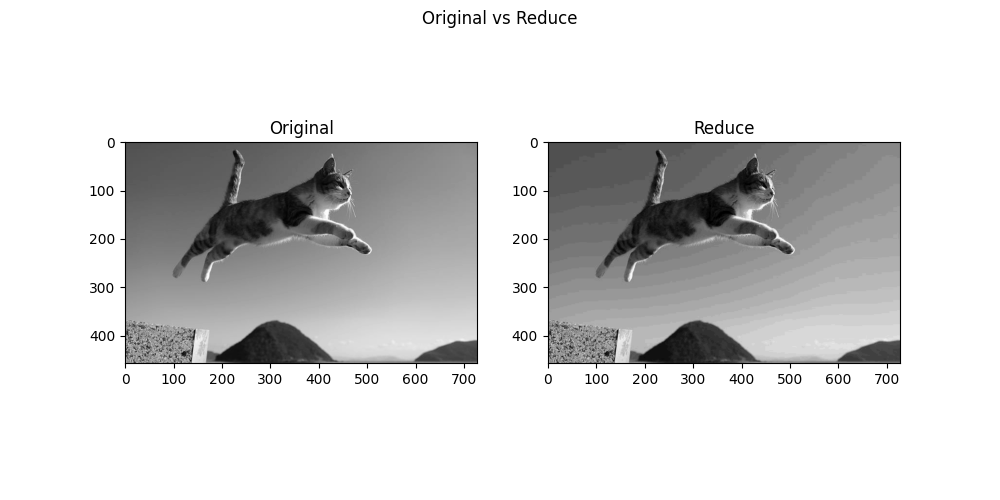

In [253]:
def quantization(image, bit, smax, smin):
    image = ((image-smin)/(smax-smin))*(2**bit)
    image = image.astype(np.uint8)
        
    return image

fig = plt.figure(figsize=(10, 5))
fig.suptitle("Original vs Reduce")
rows = 1
columns = 2

image = plt.imread('./cat.jpg')
gray = cv.cvtColor(image.copy(), cv.COLOR_RGB2GRAY)

#Original
fig.add_subplot(rows, columns, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.show()

#Reduce
fig.add_subplot(rows, columns, 2)
reduce = quantization(gray, 5, 255, 0)
plt.imshow(reduce, cmap='gray')
plt.title("Reduce")
plt.show()

## 3D Image Surface

<IPython.core.display.Javascript object>


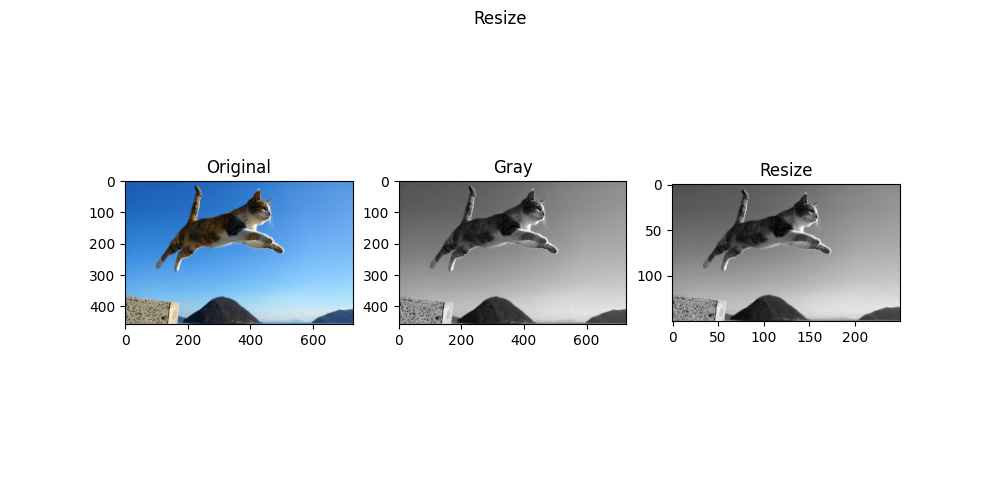

In [247]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle("Resize")
rows = 1
columns = 3

#Original
fig.add_subplot(rows, columns, 1)
image = plt.imread('./cat.jpg')
plt.imshow(image)
plt.title("Original")
plt.show()

#Convert to grayscale
fig.add_subplot(rows, columns, 2)
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.title("Gray")
plt.show()

#Resize
fig.add_subplot(rows, columns, 3)
resize = cv.resize(gray, (250, 150), interpolation=cv.INTER_AREA)
plt.imshow(resize, cmap="gray")
plt.title("Resize")
plt.show()

<IPython.core.display.Javascript object>


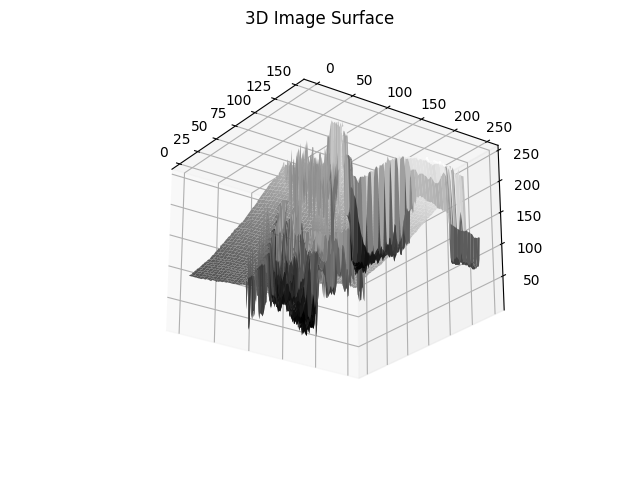

In [249]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.suptitle("3D Image Surface")

#3D Surface 
X, Y = np.mgrid[0:resize.shape[0], 0:resize.shape[1]]
Z = resize

ax.plot_surface(X, Y, Z, cmap='gray')
plt.show()

